In [26]:
# 🟩 Step 1: Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler           #model trainingfrom sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [27]:
# 🟩 Step 2: Load the dataset
# Make sure the 'customer_behavior.csv' file is in the same directory
df = pd.read_csv("customer_behavior.csv")

# Optional: Display the first few rows of the dataset
print(df.head())


   total_spent  avg_purchase_value  visits_per_month      buyer_type
0  4007.982067          235.560678                 3  bargain_hunter
1  3117.968387          313.883912                13  bargain_hunter
2  4232.062646          122.280804                15  bargain_hunter
3   577.820196          470.747406                20   premium_buyer
4  2839.005107           23.207422                19  bargain_hunter


In [28]:
# 🟩 Step 3: Select features and encode the target labels
# Features used for prediction
X = df[['total_spent', 'avg_purchase_value', 'visits_per_month']]

# Encode 'buyer_type' column: 0 = bargain_hunter, 1 = premium_buyer
y = df['buyer_type'].map({'bargain_hunter': 0, 'premium_buyer': 1})


In [29]:
# 🟩 Step 4: Split the dataset into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
# 🟩 Step 5: Standardize the feature values for better performance
# This scales the data so that each feature has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
# 🟩 Step 6: Train the Random Forest Classifier
# Random Forest is an ensemble method that uses multiple decision trees
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)  # Fit the model on training data


RandomForestClassifier(random_state=42)

In [32]:
# 🟩 Step 7: Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [33]:
# 🟩 Step 8: Evaluate the model
# Confusion Matrix helps visualize the performance of classification
conf_matrix = confusion_matrix(y_test, y_pred)
print("🔍 Confusion Matrix:\n", conf_matrix)

# Classification report gives precision, recall, F1-score, and support
report = classification_report(
    y_test, y_pred, target_names=['bargain_hunter', 'premium_buyer']
)
print("\n📊 Classification Report:\n", report)


🔍 Confusion Matrix:
 [[11  1]
 [ 7  1]]

📊 Classification Report:
                 precision    recall  f1-score   support

bargain_hunter       0.61      0.92      0.73        12
 premium_buyer       0.50      0.12      0.20         8

      accuracy                           0.60        20
     macro avg       0.56      0.52      0.47        20
  weighted avg       0.57      0.60      0.52        20



In [34]:
from sklearn.metrics import accuracy_score

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy Score: {accuracy * 100:.2f}%")



✅ Accuracy Score: 60.00%


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


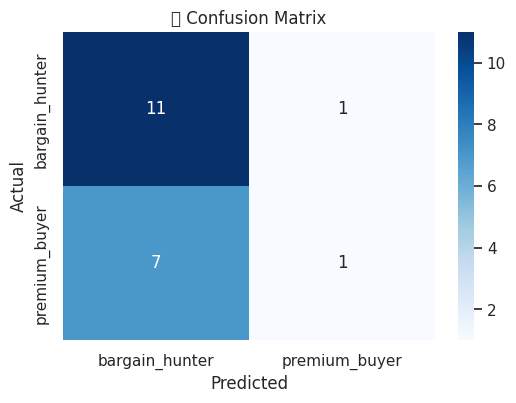

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['bargain_hunter', 'premium_buyer'],
            yticklabels=['bargain_hunter', 'premium_buyer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('📉 Confusion Matrix')
plt.show()
